#  A. Jakarta Composite Index

In [1]:
library(pacman)
pacman::p_load(tidyverse, tidyr, psych, corrplot, readxl, lubridate, finalfit, scales, data.table, reshape2, corrr,
               psy, polycor, Gifi, MPsychoR, fpp2)

# 1. Data Cleaning

In [2]:
raw_data <- read_excel('Data_Capital Flow and Banking Credit in Indonesia.xlsx')
head(raw_data)

Period,Total Credit,Gross Capital Inflows,Foreign Direct Investment,Portfolio Investment,Other Investment,Real GDP (2010 Price),Nominal GDP (SNA 2008),Inflation (2012=100),BI Rate,Exchange Rate,Yield Government Bond (1 year),JCI (Jakarta Composite Index)
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NA,BI,BI,NA,NA,NA,CEIC and BI,CEIC and BI,CEIC,CEIC,CEIC,Bloomberg,Bloomberg
NA,(IDR billions),(IDR billions),NA,NA,NA,(IDR billions),(IDR billions),(%),(%),(IDR/USD),(%),(Index)
2004Q1,449360,19871.092330922384,13230.98,14482.052,-7843.972,1181396.8611861458,571496.82973288314,5.2116950000000086,7.42,8460.0319865333331,7.83,735.67700000000002
2004Q2,491400,5590.573500927595,13323.34,1497.583,-9230.345,1225050.3990619313,605509.92850276956,7.2617250000000091,7.34,8985.3155806166669,7.81,732.40099999999995
2004Q3,518520,20194.762611551716,10633.21,8460.338,1101.215,1266106.2754800245,636526.14230817766,6.4525170000000092,7.39,9150.8619047633347,7.26,820.13400000000001
2004Q4,559450,24681.709963456353,15043.17,11419.814,-1778.081,1240190.4050212866,630876.52748598764,6.4008010000000102,7.43,9116.9608655066677,8.0299999999999905,1000.2329999999999


In [3]:
#Eliminate the first two rows
raw_data2 <- raw_data[c(-1, -2),]
head(raw_data2)

Period,Total Credit,Gross Capital Inflows,Foreign Direct Investment,Portfolio Investment,Other Investment,Real GDP (2010 Price),Nominal GDP (SNA 2008),Inflation (2012=100),BI Rate,Exchange Rate,Yield Government Bond (1 year),JCI (Jakarta Composite Index)
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2004Q1,449360,19871.092330922384,13230.98,14482.052,-7843.972,1181396.8611861458,571496.82973288314,5.2116950000000086,7.42,8460.0319865333331,7.83,735.67700000000002
2004Q2,491400,5590.573500927595,13323.34,1497.583,-9230.345,1225050.3990619313,605509.92850276956,7.2617250000000091,7.34,8985.3155806166669,7.81,732.40099999999995
2004Q3,518520,20194.762611551716,10633.21,8460.338,1101.215,1266106.2754800245,636526.14230817766,6.4525170000000092,7.39,9150.8619047633347,7.26,820.13400000000001
2004Q4,559450,24681.709963456353,15043.17,11419.814,-1778.081,1240190.4050212866,630876.52748598764,6.4008010000000102,7.43,9116.9608655066677,8.0299999999999905,1000.2329999999999
2005Q1,582509.90399999998,16374.349108121849,16457.34,6808.388,-6890.456,1251866.8055747771,673446.34146067663,8.72507400000001,7.44,9273.2060846533332,8.15,1080.165
2005Q2,629062.23800000001,37106.760191299494,45461.98,-7075.030,-1280.192,1296976.2805206357,719283.72864714463,7.4224260000000104,8.25,9543.6988835699995,9.2799999999999905,1122.376


In [4]:
#Convert Period column from char type to date 
raw_data2['Period'] <- lapply(raw_data2['Period'], function (x) yq(x))

In [5]:
#Convert char type data to numeric
ind_char <- sapply(raw_data2, is.character)
raw_data2[, ind_char] <- sapply(raw_data2[, ind_char], as.numeric)
ff_glimpse(raw_data2)

,label,var_type,n,missing_n,missing_percent,mean,sd,min,quartile_25,median,quartile_75,max
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Total.Credit,Total.Credit,<dbl>,56,0,0.0,2185797.5,1379626.6,449360.0,900836.6,1790339.6,3491445.5,4737944.0
Gross.Capital.Inflows,Gross.Capital.Inflows,<dbl>,56,0,0.0,74919.0,62973.7,-139591.9,36086.3,67329.5,106753.4,215897.1
Foreign.Direct.Investment,Foreign.Direct.Investment,<dbl>,56,0,0.0,38129.6,33574.4,-123625.0,19768.3,33396.1,58627.0,119995.5
Portfolio.Investment,Portfolio.Investment,<dbl>,56,0,0.0,33188.0,35658.7,-44154.8,10601.2,27632.8,52174.3,111124.9
Other.Investment,Other.Investment,<dbl>,56,0,0.0,4618.7,20692.8,-47177.8,-7094.4,-908.3,13870.3,59336.8
Real.GDP..2010.Price.,Real.GDP..2010.Price.,<dbl>,56,0,0.0,1803163.8,398523.0,1181396.9,1460553.8,1761920.6,2142549.2,2552216.5
Nominal.GDP..SNA.2008.,Nominal.GDP..SNA.2008.,<dbl>,56,0,0.0,1881200.1,889536.4,571496.8,1075744.6,1810275.9,2638634.3,3503568.6
Inflation..2012.100.,Inflation..2012.100.,<dbl>,56,0,0.0,6.6,3.3,2.8,3.9,6.2,7.3,17.1
BI.Rate,BI.Rate,<dbl>,56,0,0.0,7.5,1.7,5.5,6.5,7.4,8.0,12.8


In [6]:
names(raw_data2) <- c('Period', 'Credit', 'Inv_CapInflows', 'Inv_FD', 'Inv_P', 'Inv_O', 'GDP_R', 'GDP_N', 'Rate_Inf', 'Rate_BI', 
                     'Rate_Exc', 'Rate_GBond', 'IDX')

In [7]:
cap_flow <-raw_data2[, c('Period', sort(names(raw_data2[,-1])))]
head(cap_flow)

Period,Credit,GDP_N,GDP_R,IDX,Inv_CapInflows,Inv_FD,Inv_O,Inv_P,Rate_BI,Rate_Exc,Rate_GBond,Rate_Inf
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2004-01-01,449360.0,571496.8,1181397,735.677,19871.092,13230.98,-7843.972,14482.052,7.42,8460.032,7.83,5.211695
2004-04-01,491400.0,605509.9,1225050,732.401,5590.574,13323.34,-9230.345,1497.583,7.34,8985.316,7.81,7.261725
2004-07-01,518520.0,636526.1,1266106,820.134,20194.763,10633.21,1101.215,8460.338,7.39,9150.862,7.26,6.452517
2004-10-01,559450.0,630876.5,1240190,1000.233,24681.710,15043.17,-1778.081,11419.814,7.43,9116.961,8.03,6.400801
2005-01-01,582509.9,673446.3,1251867,1080.165,16374.349,16457.34,-6890.456,6808.388,7.44,9273.206,8.15,8.725074
2005-04-01,629062.2,719283.7,1296976,1122.376,37106.760,45461.98,-1280.192,-7075.030,8.25,9543.699,9.28,7.422426


# 2. Exploratory Data Analysis

## 2.1 Capital Inflow = Foreign Direct Inv. + Portflio Inv. + Other Inv.

In [8]:
cbind(cap_flow[,c( 'Period','Inv_CapInflows')], Sum_inv= rowSums(cap_flow[, c(4, 5, 6)]), 
      sapply(round(cap_flow[, c(4, 5, 6)]*100/rowSums(cap_flow[, c(4, 5, 6)]),2), function(x) paste0(x, '%')))

Period,Inv_CapInflows,Sum_inv,GDP_R,IDX,Inv_CapInflows
<date>,<dbl>,<dbl>,<chr>,<chr>,<chr>
2004-01-01,19871.092,1202004,98.29%,0.06%,1.65%
2004-04-01,5590.574,1231373,99.49%,0.06%,0.45%
2004-07-01,20194.763,1287121,98.37%,0.06%,1.57%
2004-10-01,24681.710,1265872,97.97%,0.08%,1.95%
2005-01-01,16374.349,1269321,98.62%,0.09%,1.29%
2005-04-01,37106.760,1335205,97.14%,0.08%,2.78%
2005-07-01,28755.380,1369859,97.82%,0.08%,2.1%
2005-10-01,67009.884,1371695,95.03%,0.08%,4.89%
2006-01-01,48055.239,1365431,96.38%,0.1%,3.52%


## 2.2 Time series plot

In [9]:
rect1 <- data.frame(xmin=as.Date('2008-01-01'), 
                    xmax=as.Date('2009-01-01'), 
                    ymin=-Inf, 
                    ymax=Inf)

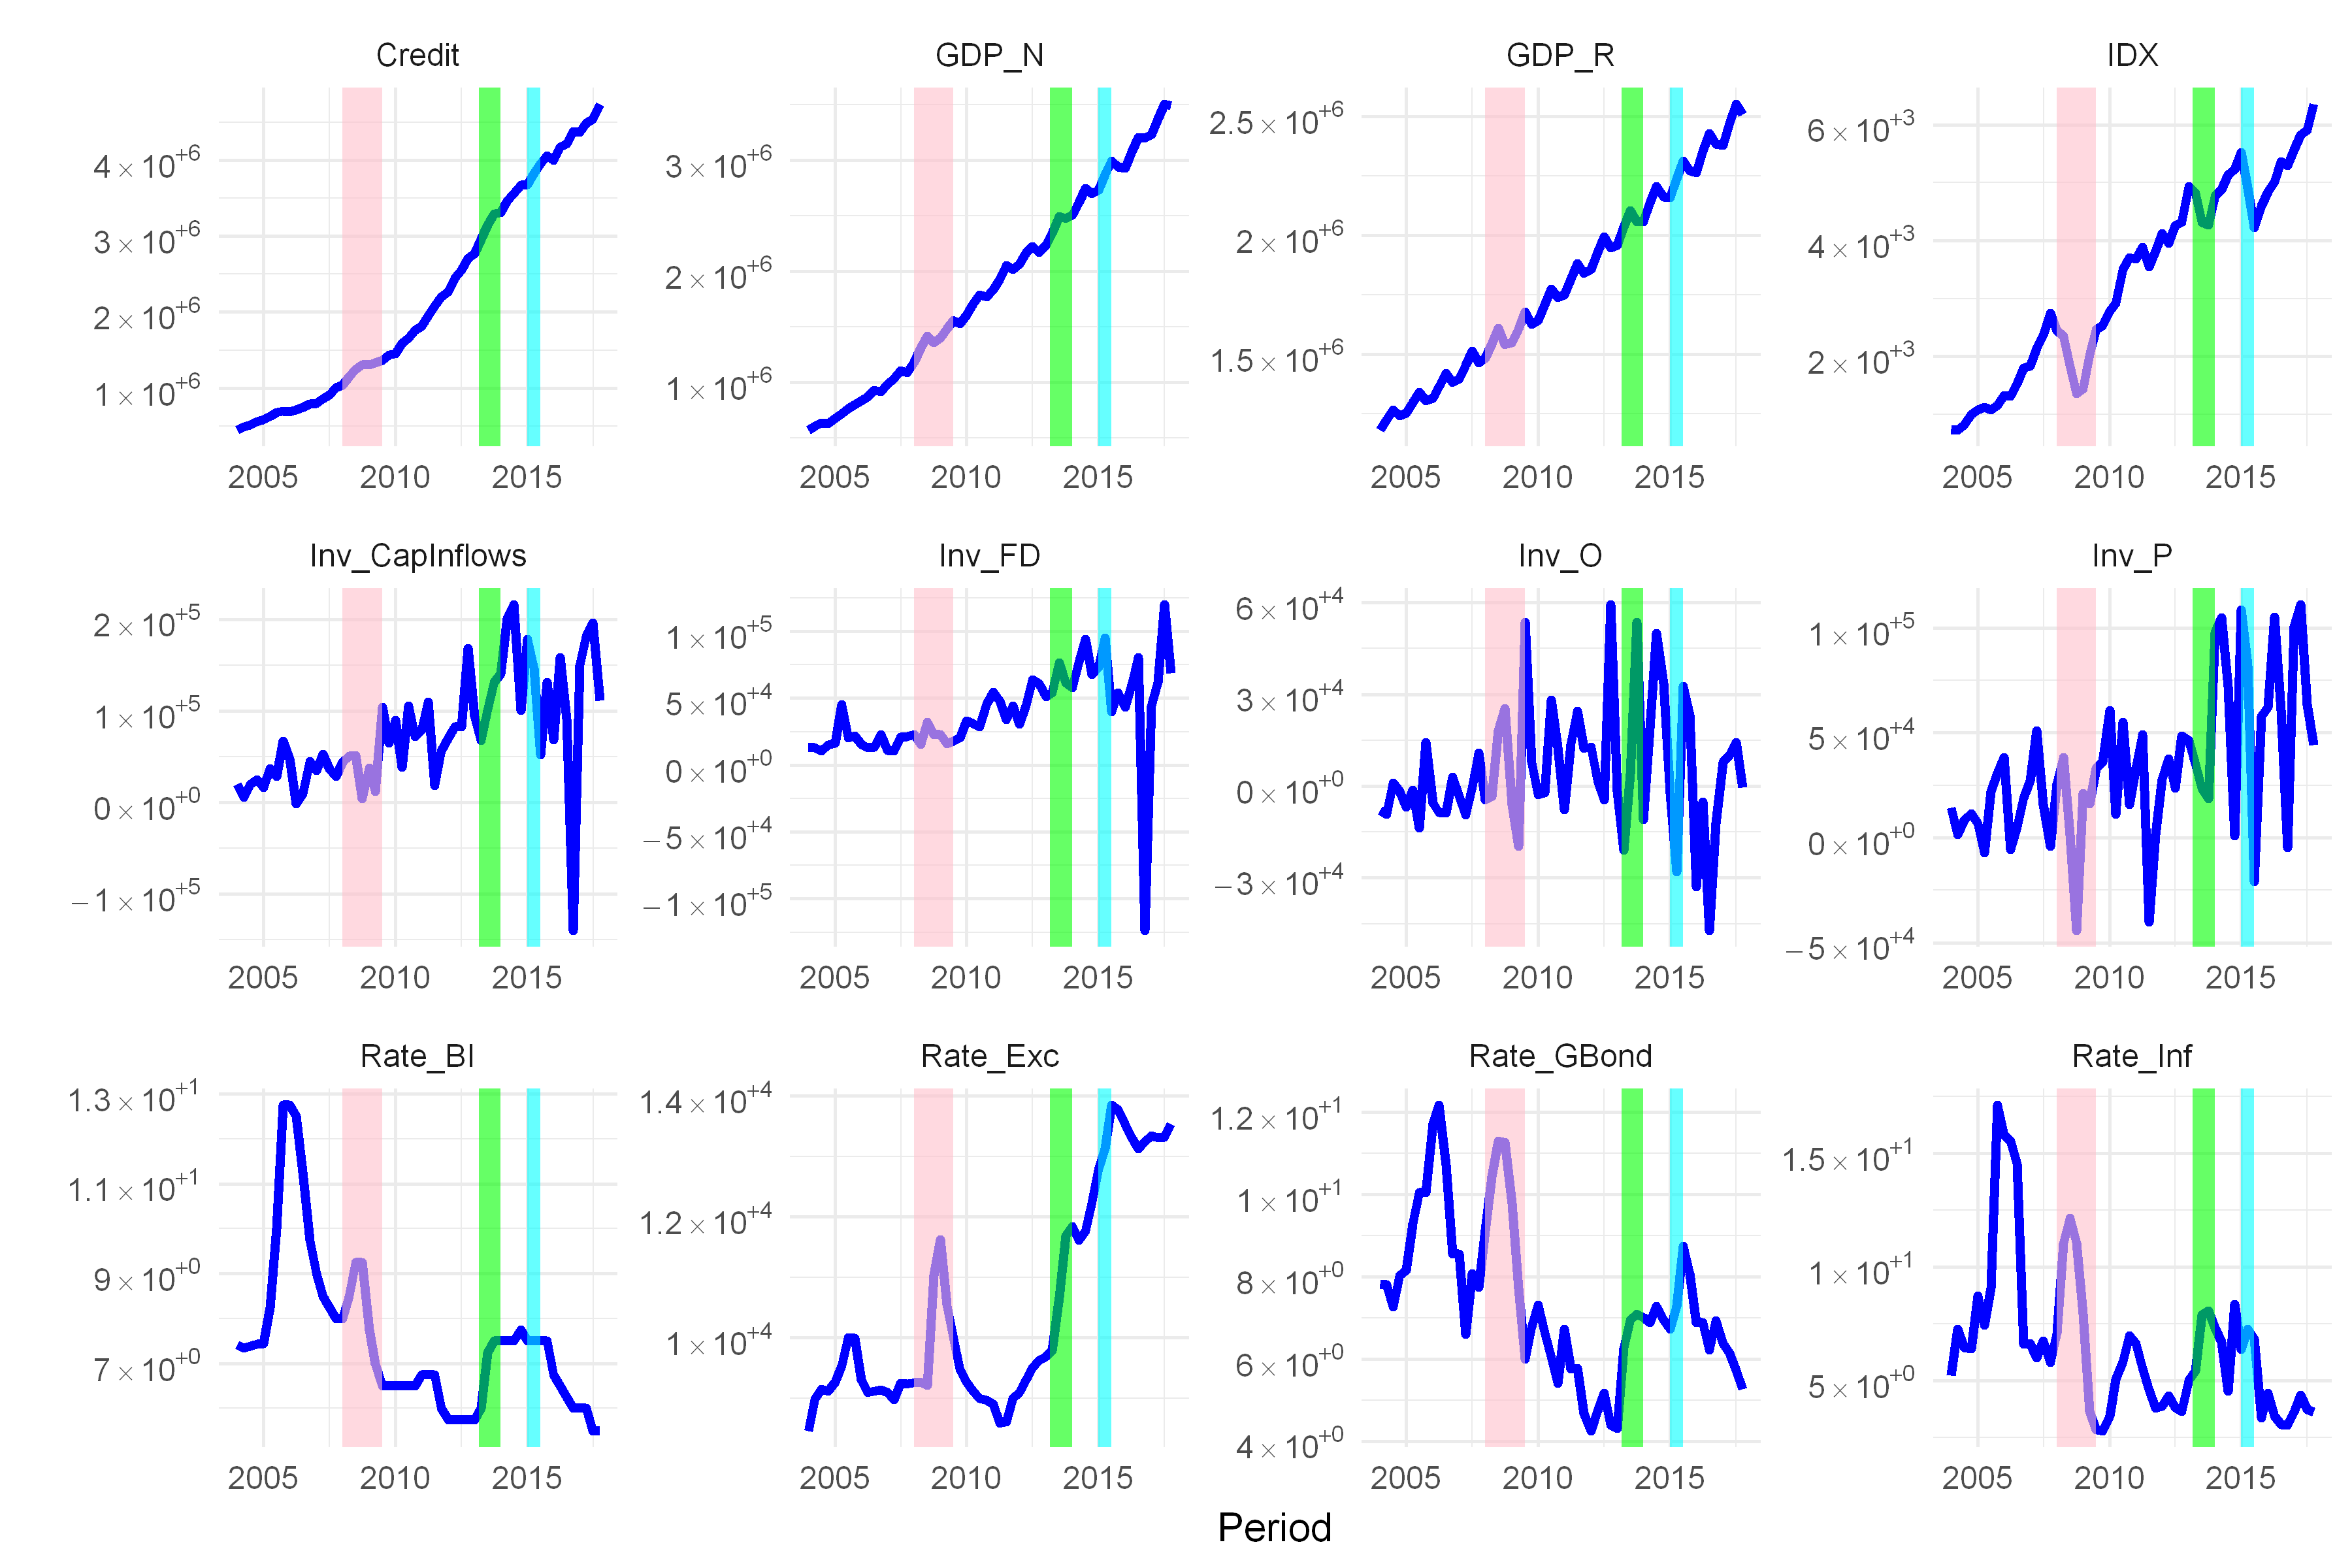

In [10]:
options(repr.plot.width =9, repr.plot.height = 6, repr.plot.res = 400)
scientific_10 <- function(x) {
  parse(text=gsub("e", " %*% 10^", scales::scientific_format()(x)))
}

cap_flow  %>% gather('var', 'val', -Period)  %>% ggplot(aes(Period, val)) + geom_line(col='blue', lwd=1.2) + 
facet_wrap(~var, scale='free') + scale_y_continuous(labels = scientific_10) + theme_minimal() + labs(y='') +
annotate("rect",xmin= as.Date('2008-01-01'), # Global Financial Crisis
                    xmax = as.Date('2009-07-01'),
                    ymin = -Inf,
                    ymax = Inf,
             alpha = 0.6, fill="pink") +
annotate("rect",xmin= as.Date('2013-03-01'), # Taper Tantrum
                    xmax = as.Date('2014-01-01'),
                    ymin = -Inf,
                    ymax = Inf,
             alpha = 0.6, fill="green") +
annotate("rect",xmin= as.Date('2015-01-01'), # FRR
                    xmax = as.Date('2015-07-01'),
                    ymin = -Inf,
                    ymax = Inf,
             alpha = 0.6, fill="cyan") +
scale_color_manual(name='Events',
                     breaks=c('Linear', 'Quadratic', 'Cubic'),
                     values=c('Cubic'='pink', 'Quadratic'='blue', 'Linear'='purple'))
      

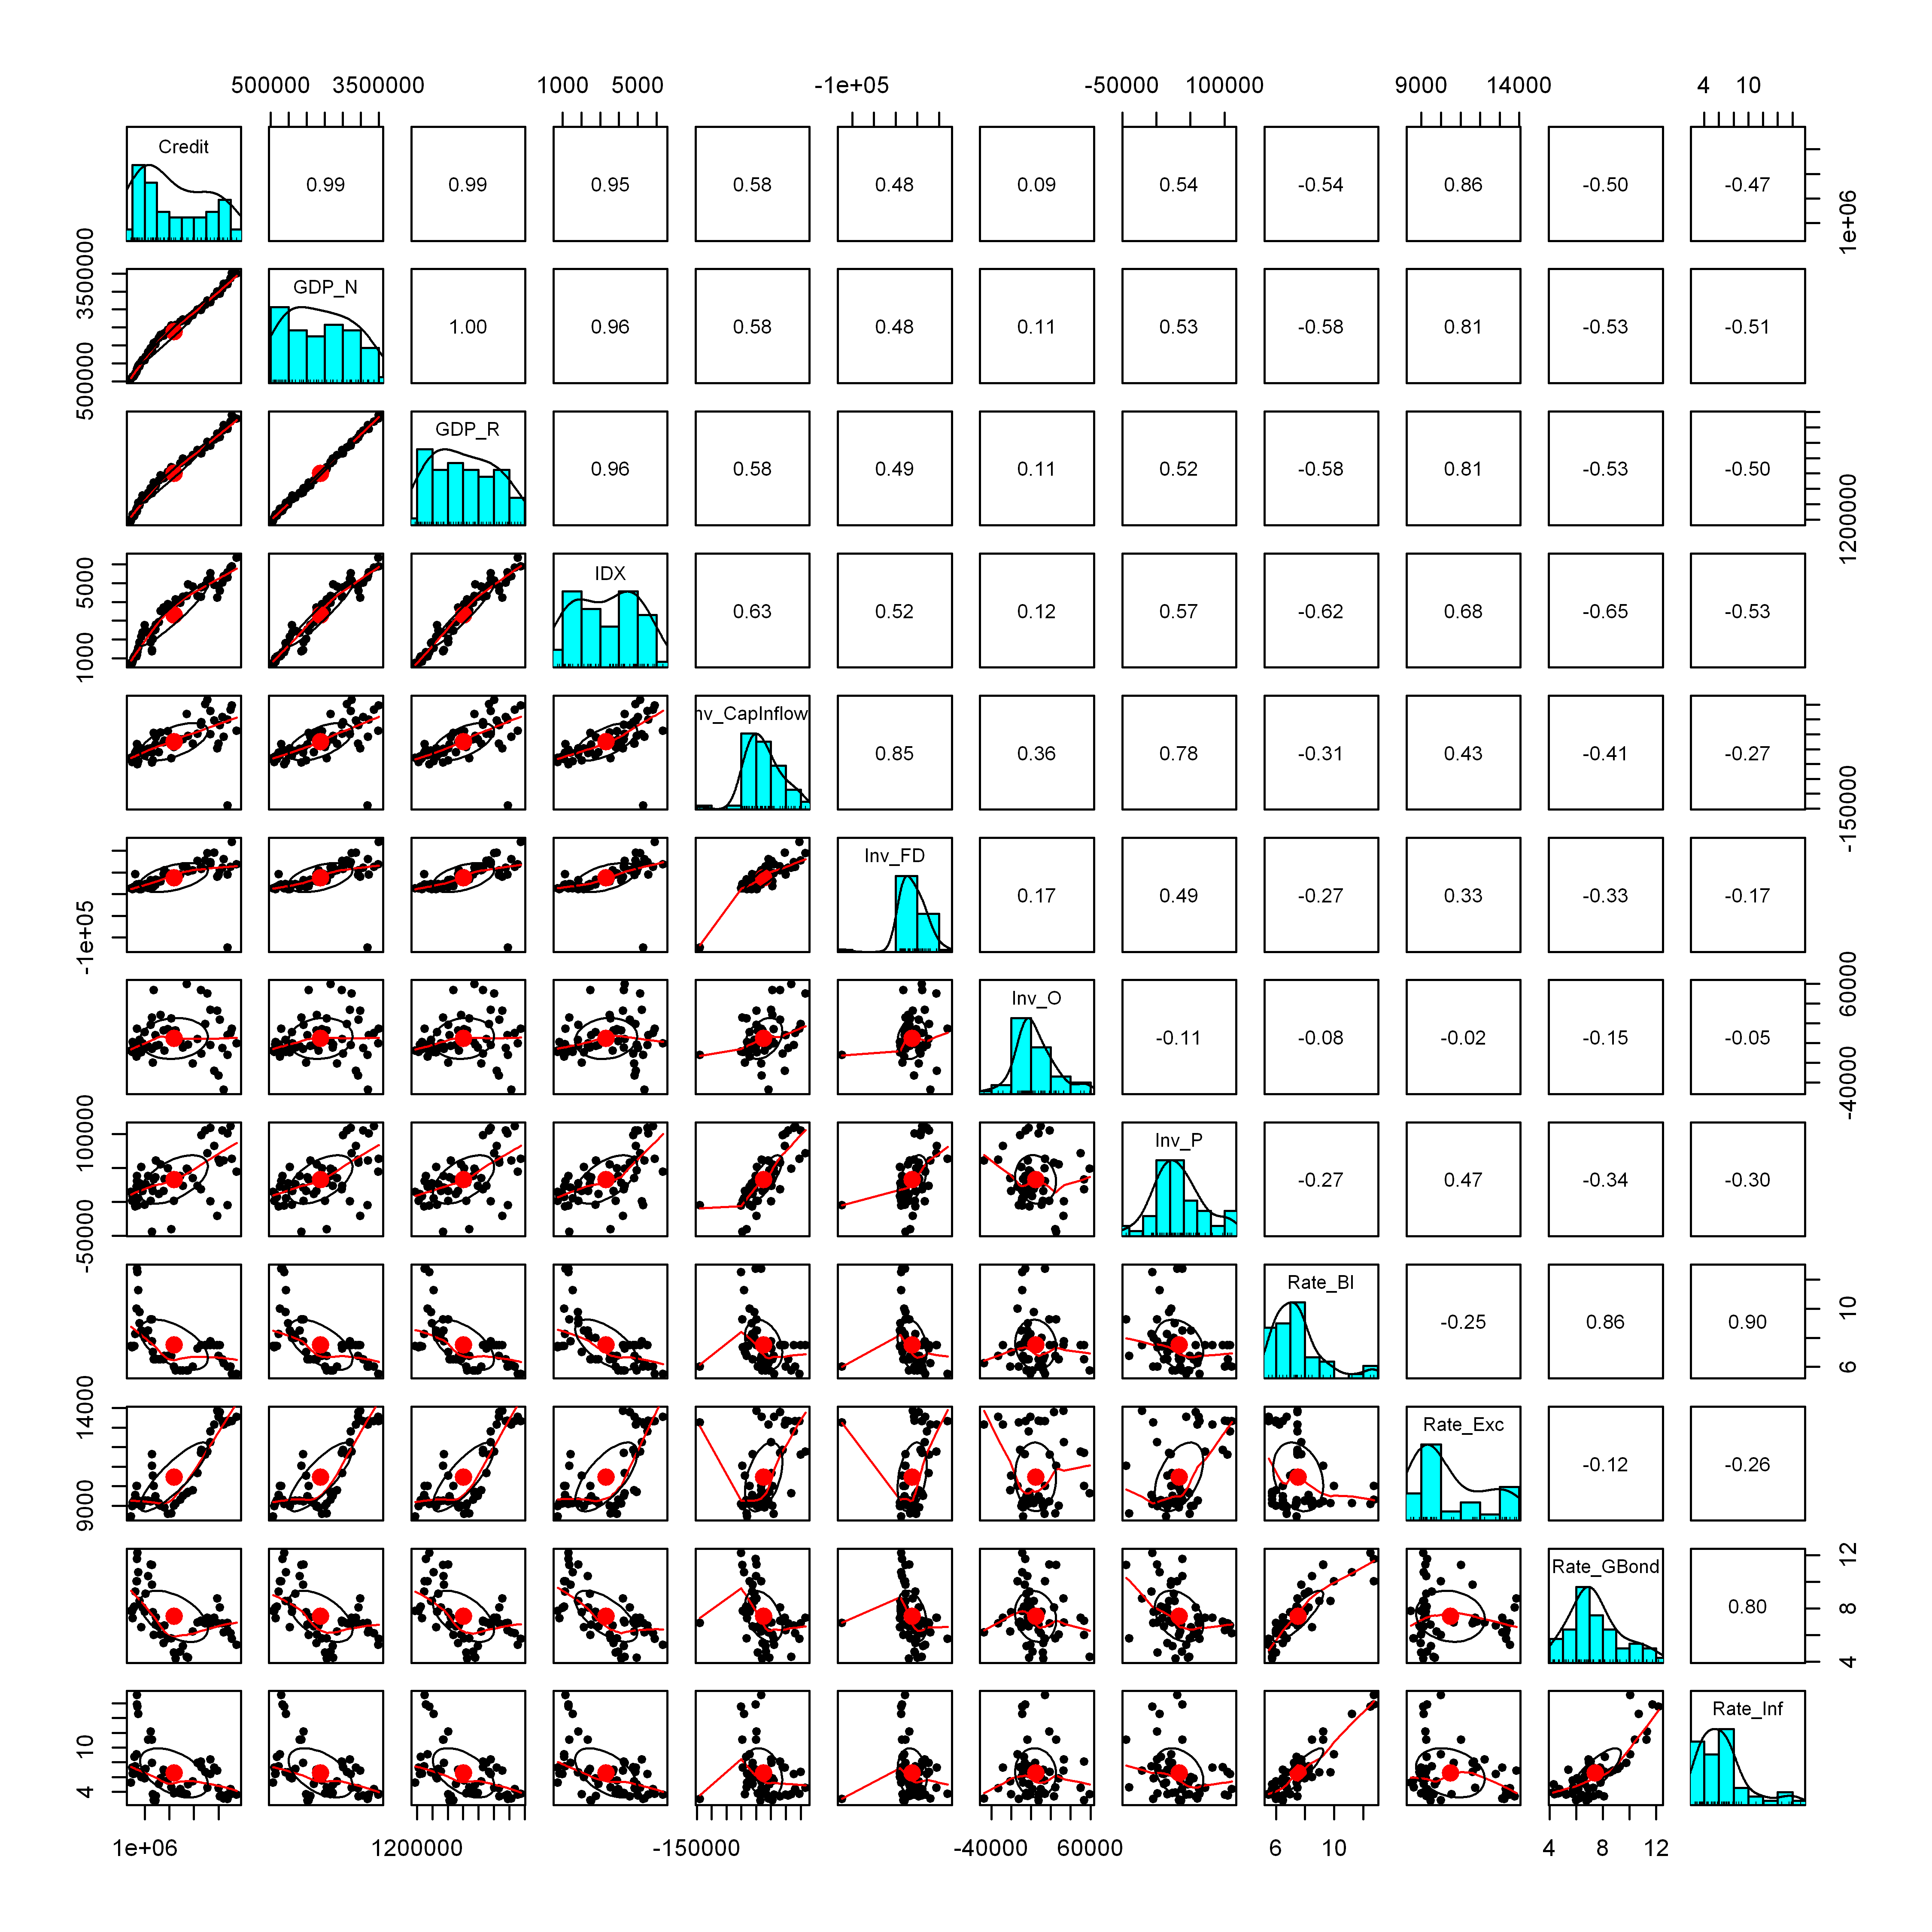

In [11]:
options(repr.plot.width =9, repr.plot.height = 9, repr.plot.res = 500)
pairs.panels(cap_flow[, c(-1)])

In [12]:
cap_flow_rate=round(((cap_flow[2:nrow(cap_flow), c(-1)]/cap_flow[1:nrow(cap_flow)-1, c(-1)]) -1)*100,2)
ff_glimpse(cap_flow_rate)

,label,var_type,n,missing_n,missing_percent,mean,sd,min,quartile_25,median,quartile_75,max
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Credit,Credit,<dbl>,55,0,0.0,4.4,2.9,-1.4,2.4,4.2,6.4,10.8
GDP_N,GDP_N,<dbl>,55,0,0.0,3.4,3.3,-4.3,0.3,4.5,5.6,10.8
GDP_R,GDP_R,<dbl>,55,0,0.0,1.4,2.7,-4.3,-1.0,3.1,3.8,4.3
IDX,IDX,<dbl>,55,0,0.0,4.6,11.0,-26.0,-0.8,5.3,9.2,41.3
Inv_CapInflows,Inv_CapInflows,<dbl>,55,0,0.0,24.5,224.0,-939.0,-42.7,6.9,49.6,860.5
Inv_FD,Inv_FD,<dbl>,55,0,0.0,4.6,59.4,-253.6,-20.2,3.5,34.7,176.2
Inv_O,Inv_O,<dbl>,55,0,0.0,-73.1,526.9,-2110.1,-163.1,-86.2,22.8,1190.4
Inv_P,Inv_P,<dbl>,55,0,0.0,129.9,1880.7,-3843.6,-101.5,-24.2,45.4,12955.8
Rate_BI,Rate_BI,<dbl>,55,0,0.0,-0.3,7.6,-16.2,-3.5,0.0,0.0,27.5


## 2.3 Rate of change

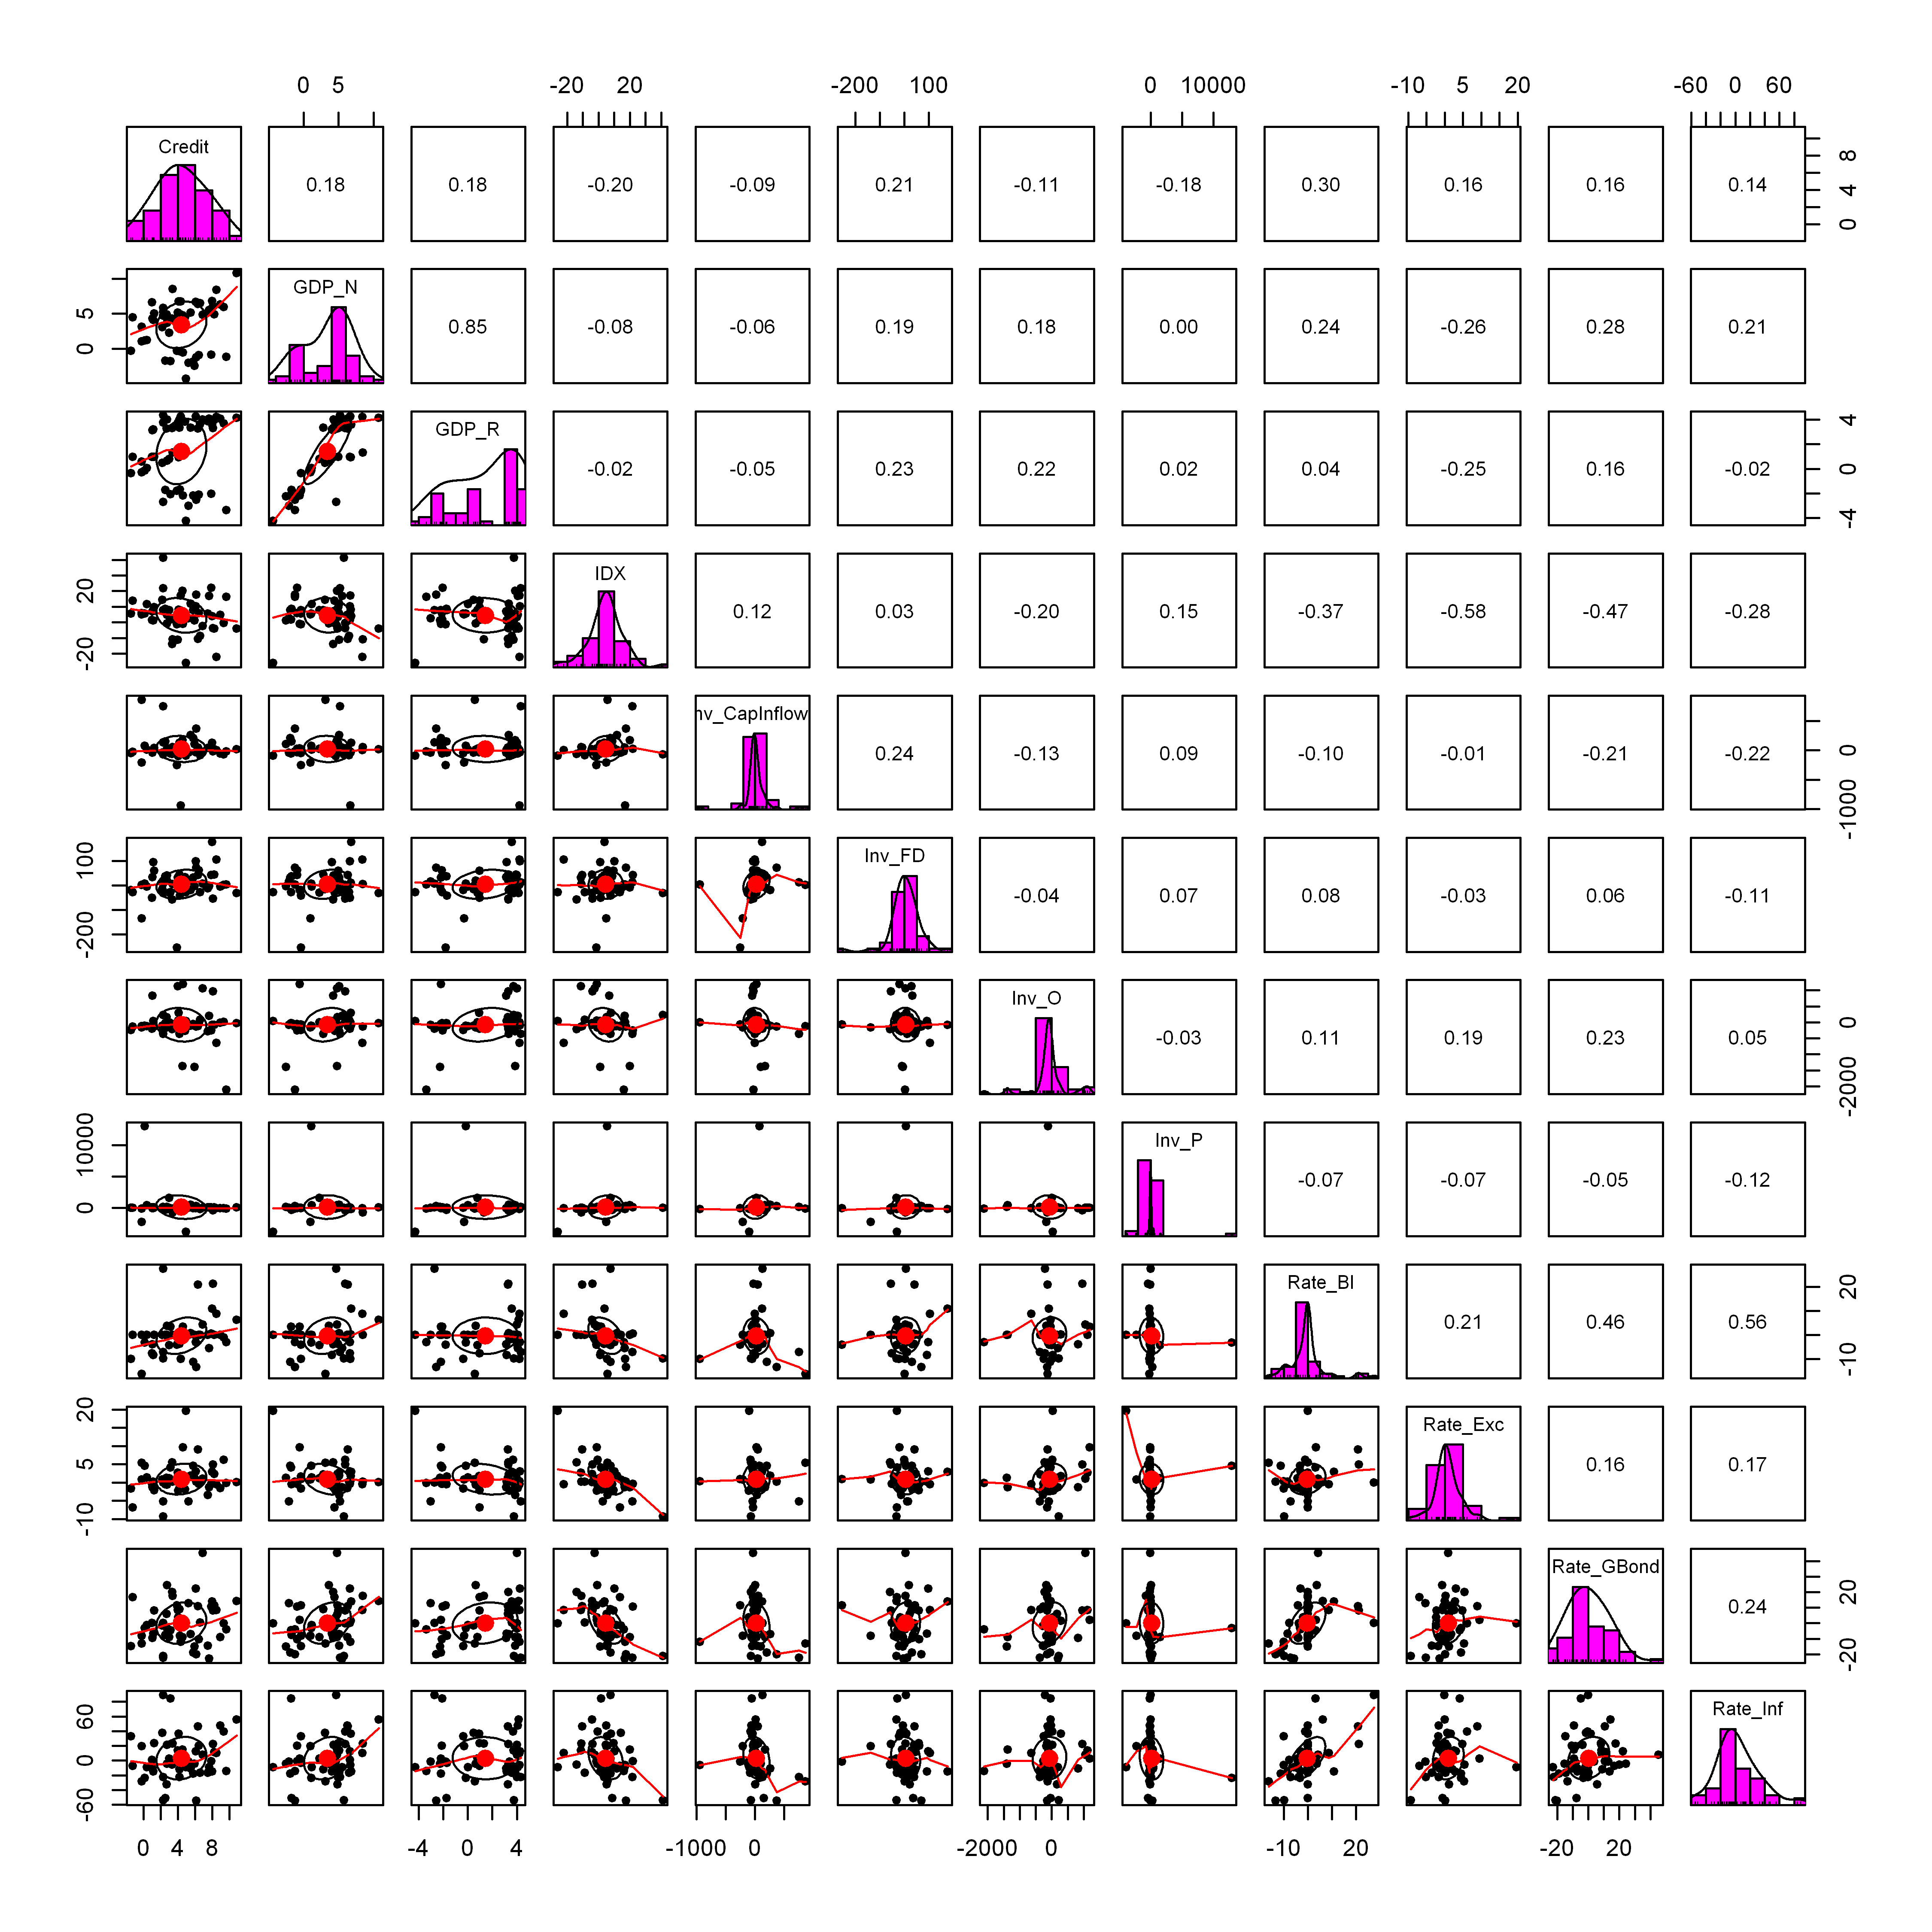

In [13]:
pairs.panels(cap_flow_rate, hist.col = 'magenta', smooth = T)

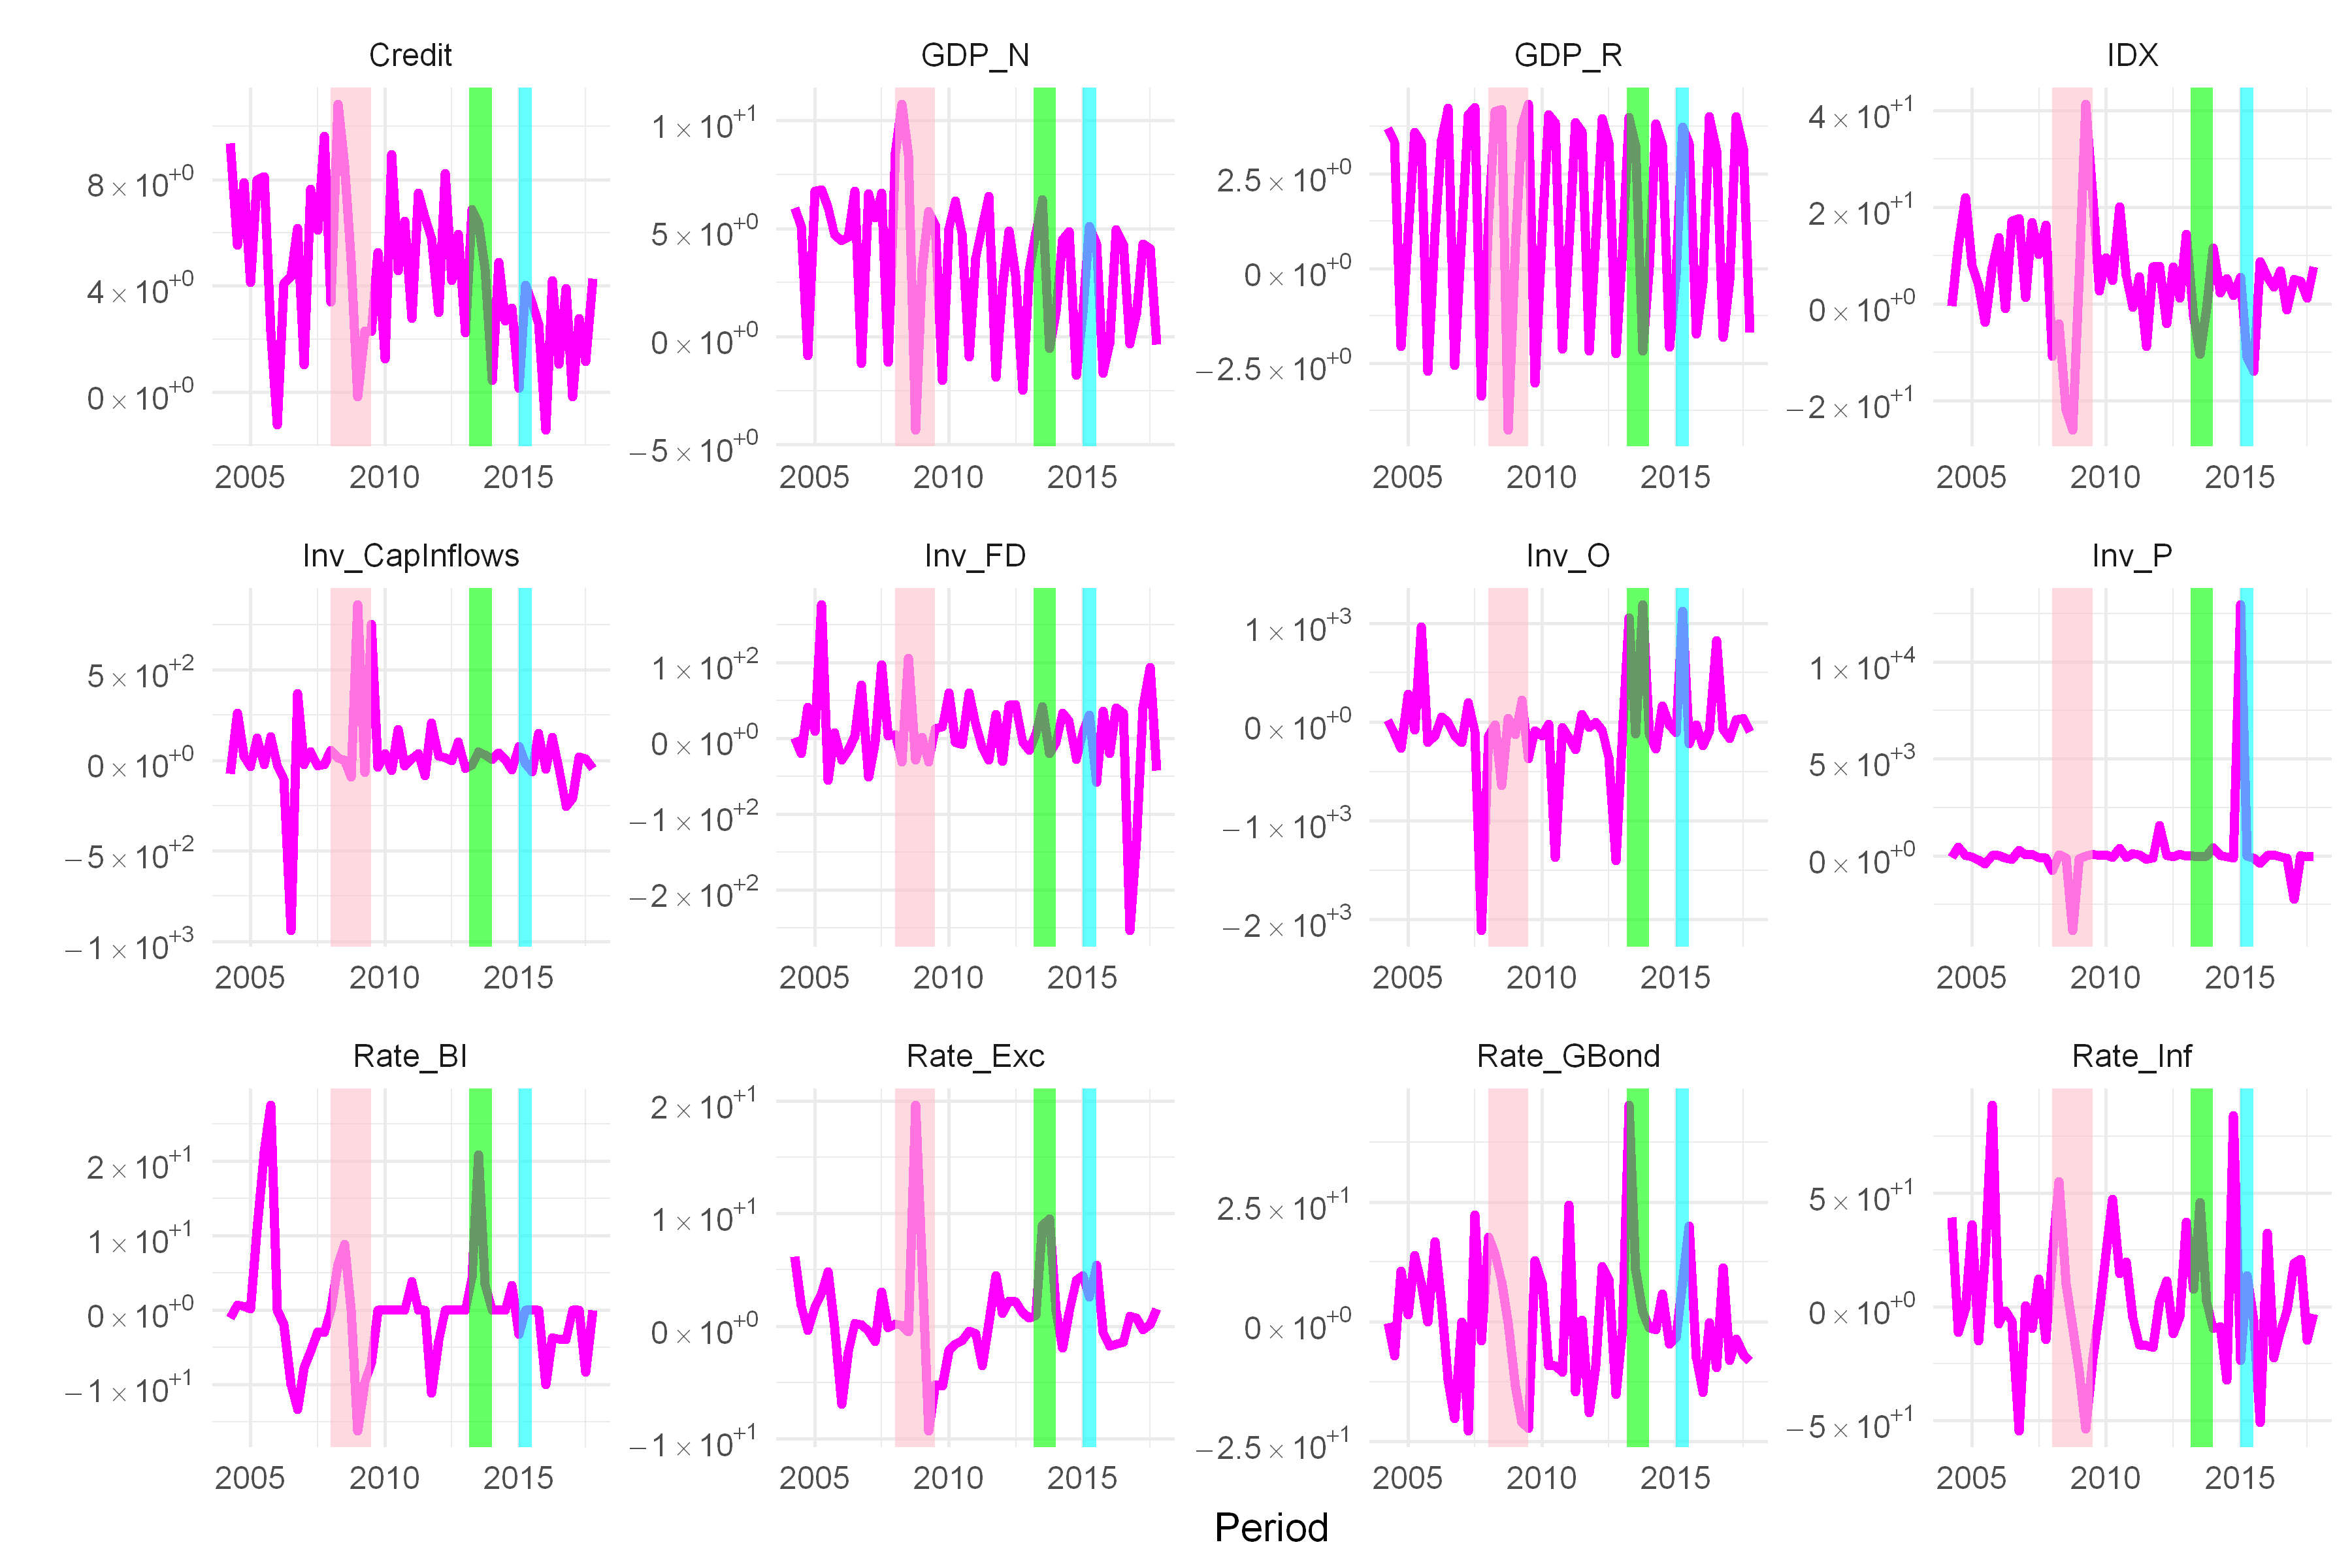

In [22]:
options(repr.plot.width =9, repr.plot.height = 6, repr.plot.res = 400)
cbind(cap_flow[-1, 1], cap_flow_rate)  %>% gather('var', 'val', -Period)  %>% ggplot(aes(Period, val)) + geom_line(col='magenta', lwd=1.2) + 
facet_wrap(~var, scale='free') + scale_y_continuous(labels = scientific_10) + theme_minimal() + labs(y='') +
annotate("rect",xmin= as.Date('2008-01-01'), # Global Financial Crisis
                    xmax = as.Date('2009-07-01'),
                    ymin = -Inf,
                    ymax = Inf,
             alpha = 0.6, fill="pink") +
annotate("rect",xmin= as.Date('2013-03-01'), # Taper Tantrum
                    xmax = as.Date('2014-01-01'),
                    ymin = -Inf,
                    ymax = Inf,
             alpha = 0.6, fill="green") +
annotate("rect",xmin= as.Date('2015-01-01'), # FRR
                    xmax = as.Date('2015-07-01'),
                    ymin = -Inf,
                    ymax = Inf,
             alpha = 0.6, fill="cyan") +
scale_color_manual(name='Events',
                     breaks=c('Linear', 'Quadratic', 'Cubic'),
                     values=c('Cubic'='pink', 'Quadratic'='blue', 'Linear'='purple'))

In [15]:
library(data.table)
setDT(reshape2::melt(abs(cor(cap_flow_rate))))[Var1 != Var2, .SD[which.max(value)], keyby=Var1]

Var1,Var2,value
<fct>,<fct>,<dbl>
Credit,Rate_BI,0.2985924
GDP_N,GDP_R,0.8455238
GDP_R,GDP_N,0.8455238
IDX,Rate_Exc,0.5842000
Inv_CapInflows,Inv_FD,0.2418895
Inv_FD,Inv_CapInflows,0.2418895
Inv_O,Rate_GBond,0.2295634
Inv_P,Credit,0.1754835
Rate_BI,Rate_Inf,0.5614434


In [16]:
cap_flow_rate%>%
    correlate() %>% 
    stretch() %>% 
    arrange(r)   %>% head(10)

Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


x,y,r
<chr>,<chr>,<dbl>
IDX,Rate_Exc,-0.5842000
Rate_Exc,IDX,-0.5842000
IDX,Rate_GBond,-0.4709779
Rate_GBond,IDX,-0.4709779
IDX,Rate_BI,-0.3672177
Rate_BI,IDX,-0.3672177
IDX,Rate_Inf,-0.2814080
Rate_Inf,IDX,-0.2814080
GDP_N,Rate_Exc,-0.2565091


In [17]:
cap_flow_rate%>%
    correlate() %>% 
    stretch() %>% 
    arrange(r)  %>% na.omit()  %>% tail(10)

Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


x,y,r
<chr>,<chr>,<dbl>
GDP_N,Rate_GBond,0.2806423
Rate_GBond,GDP_N,0.2806423
Credit,Rate_BI,0.2985924
Rate_BI,Credit,0.2985924
Rate_BI,Rate_GBond,0.4564010
Rate_GBond,Rate_BI,0.4564010
Rate_BI,Rate_Inf,0.5614434
Rate_Inf,Rate_BI,0.5614434
GDP_N,GDP_R,0.8455238


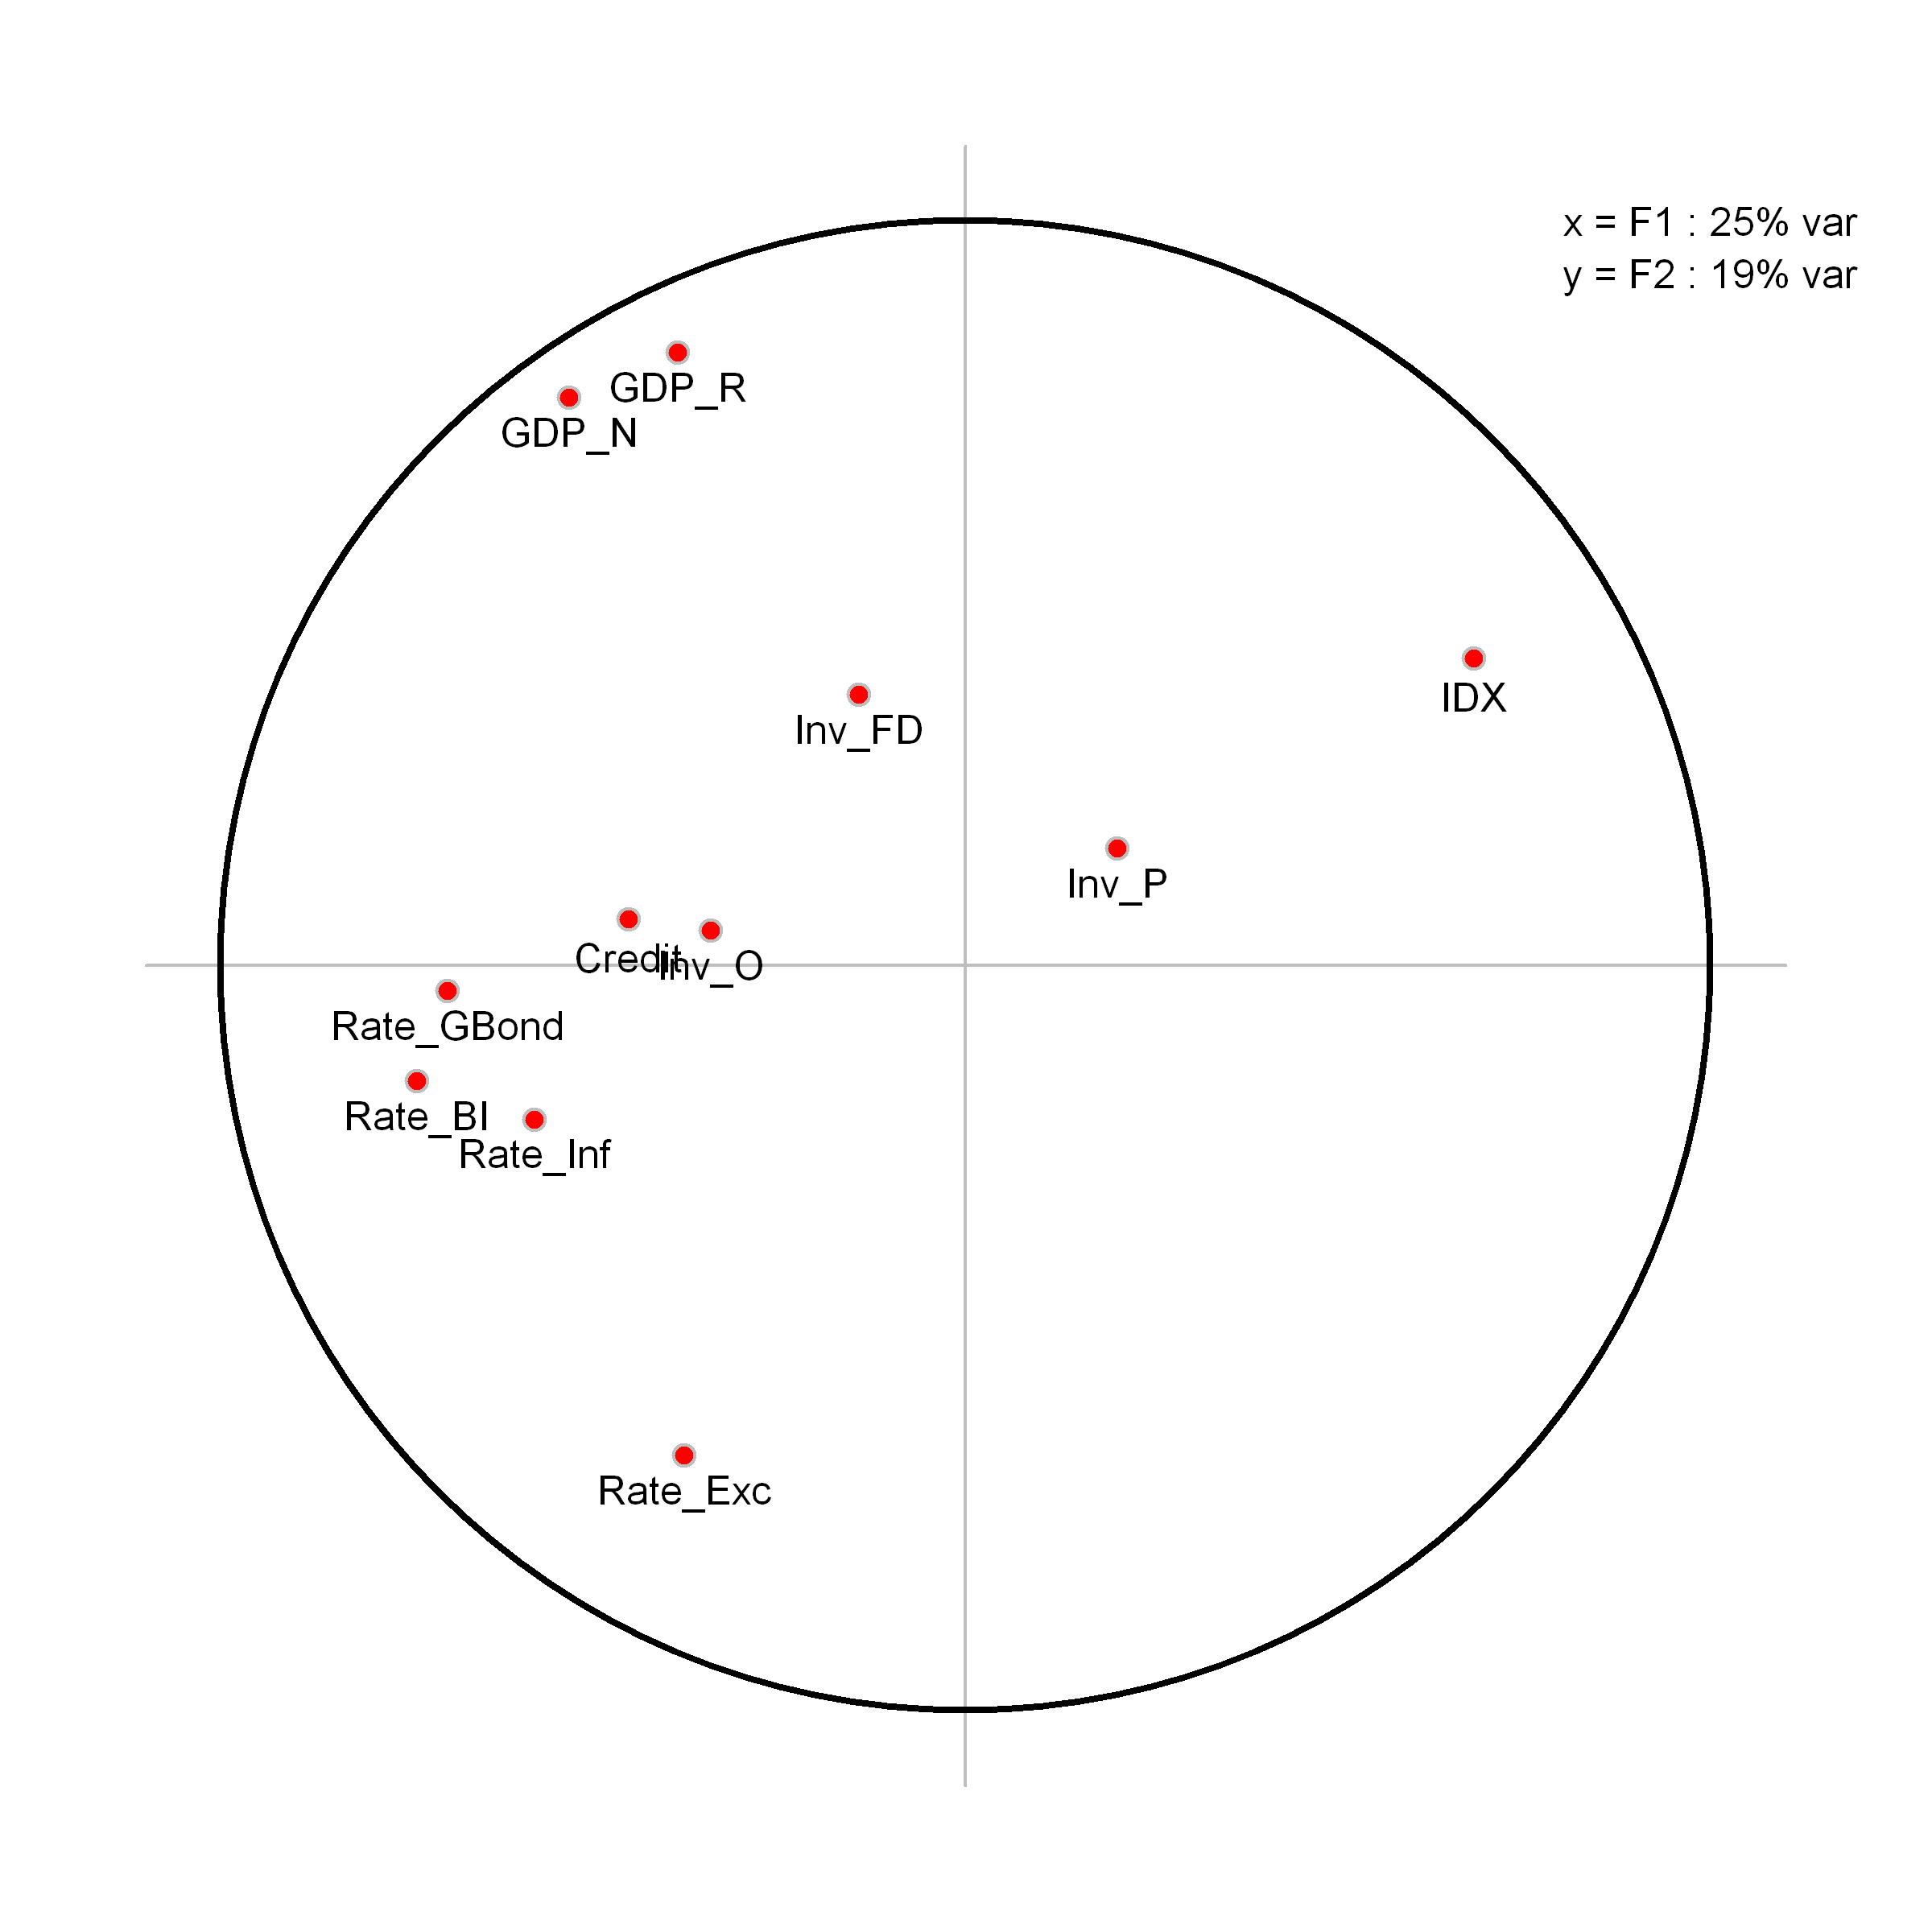

In [18]:
options(repr.plot.width =6, repr.plot.height = 6, repr.plot.res = 400)
mdspca(cap_flow_rate[,-5])

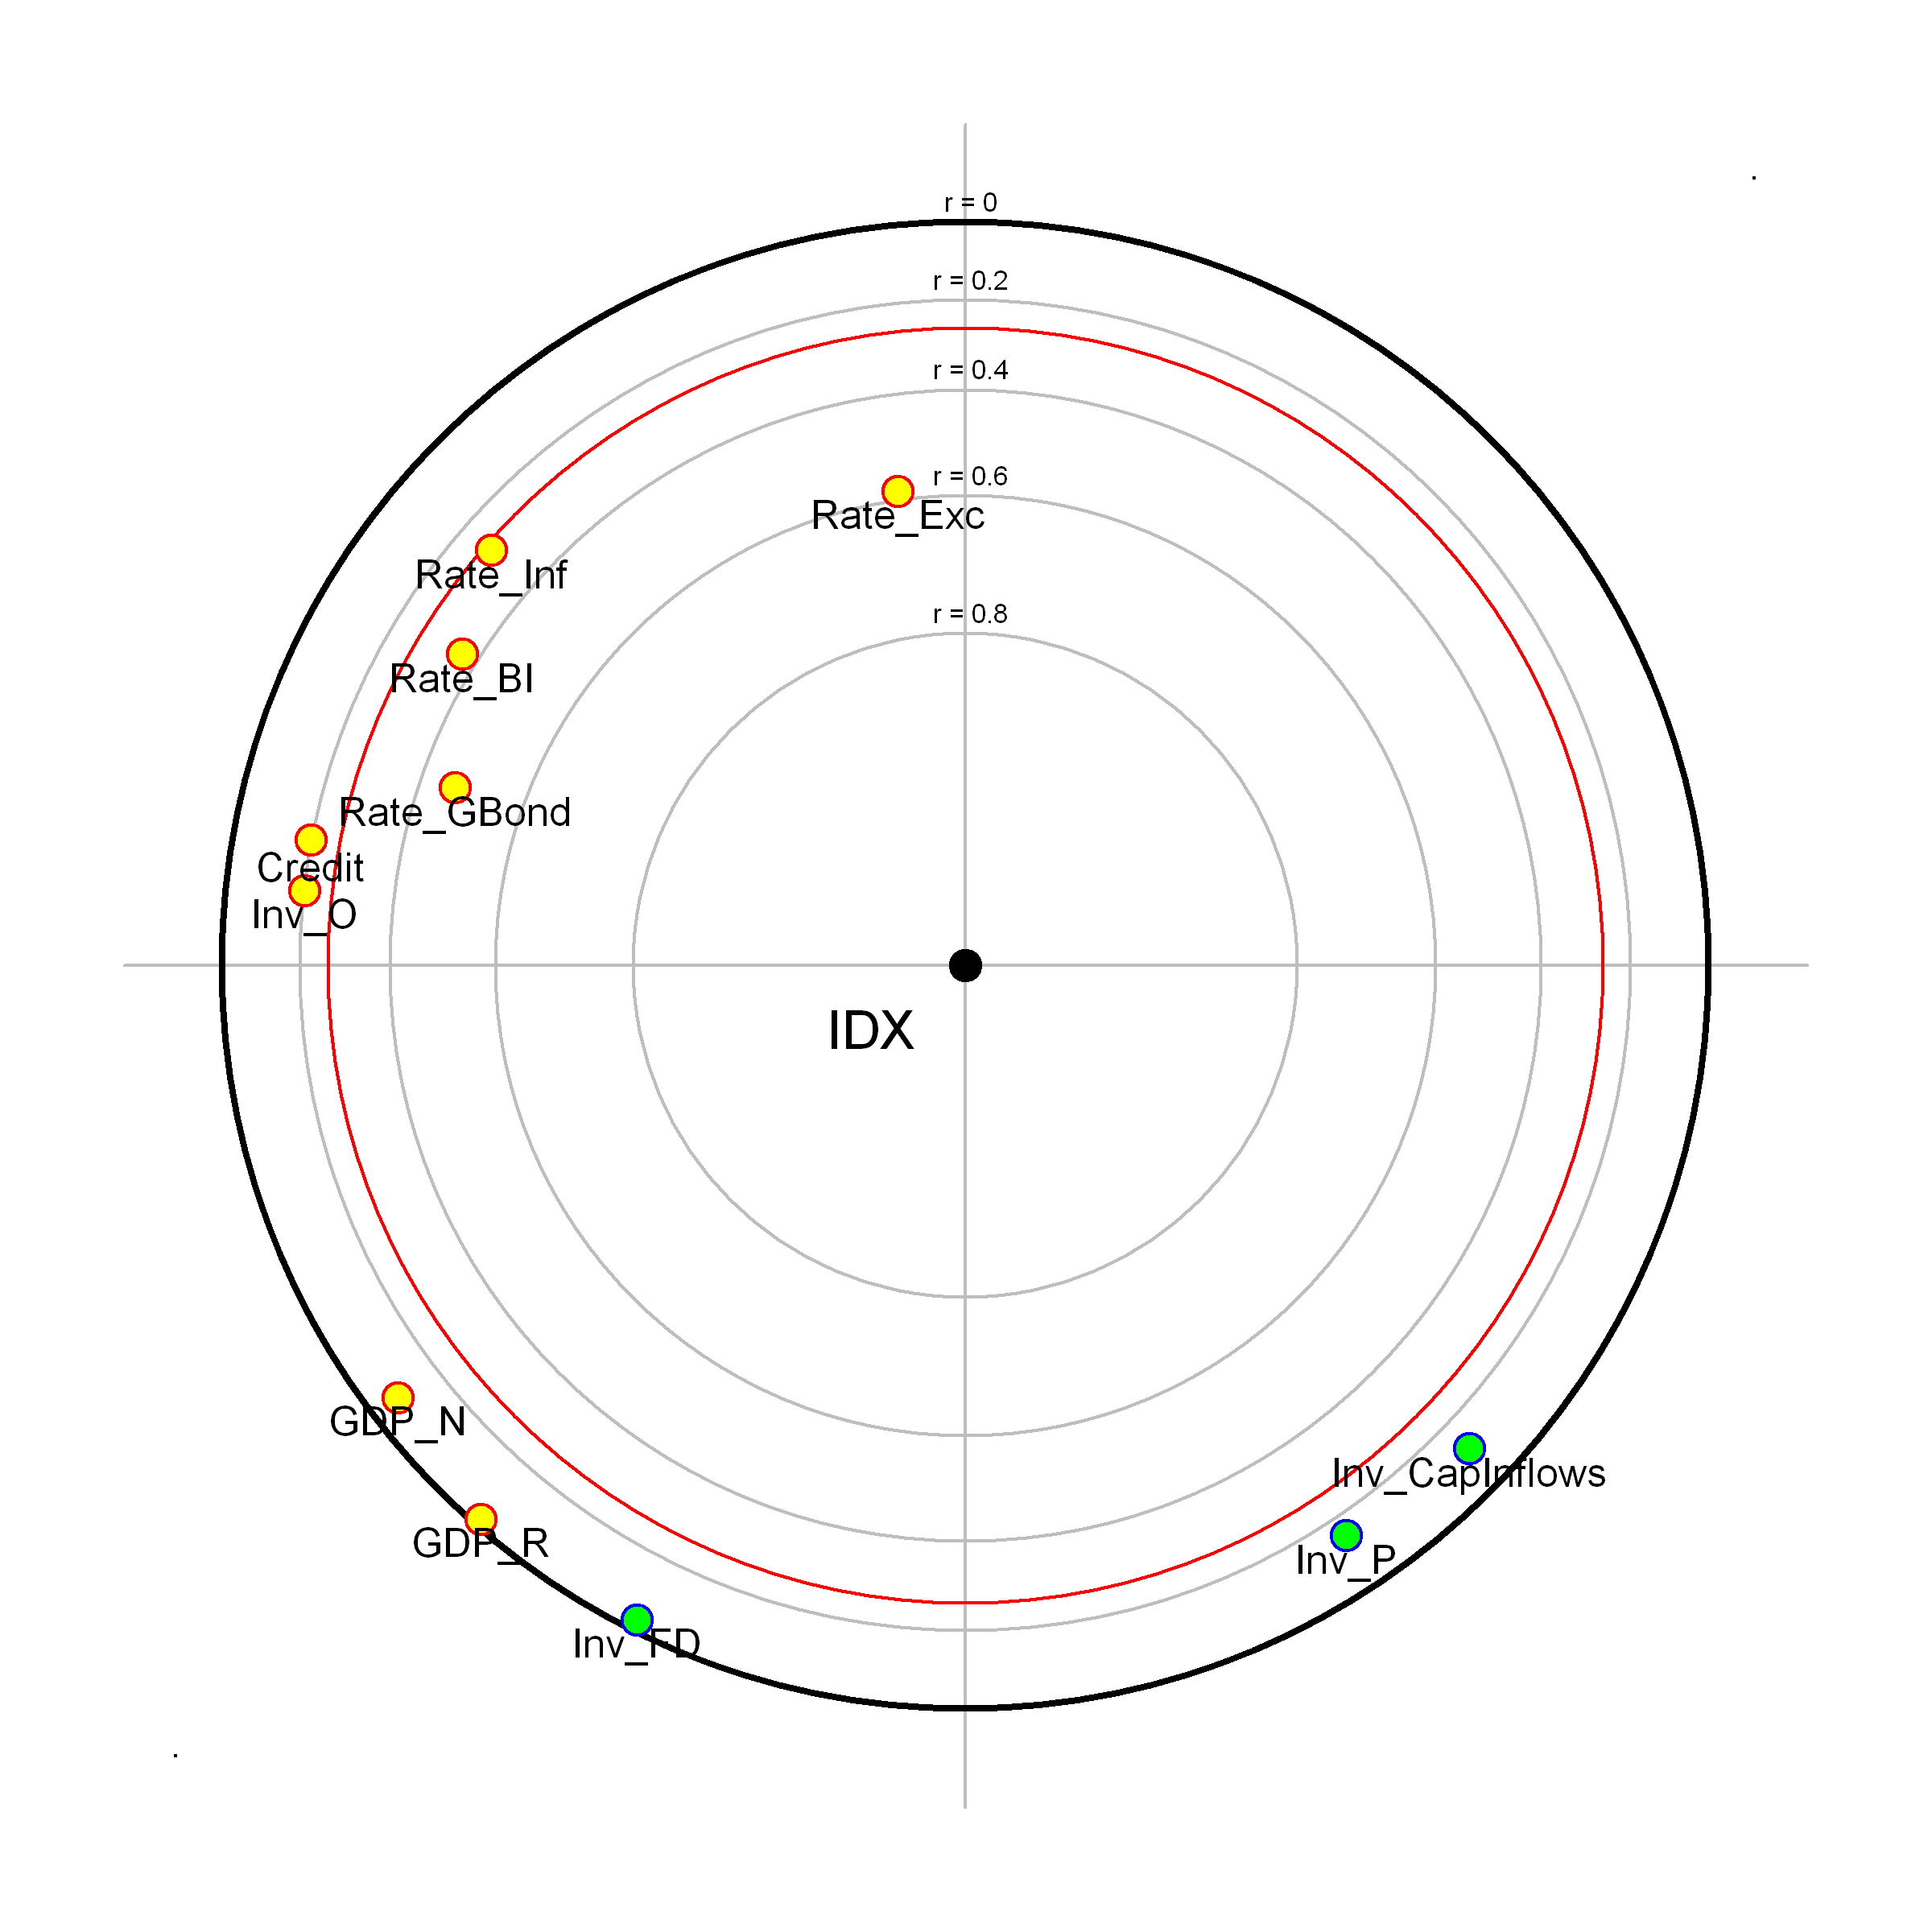

In [19]:
response <- "IDX"
explanatory <- names(cap_flow_rate[, c(-4)])
fpca(data =cap_flow_rate , y = response, x = explanatory, partial = "No")

## 2.4 GDP is Interesting!

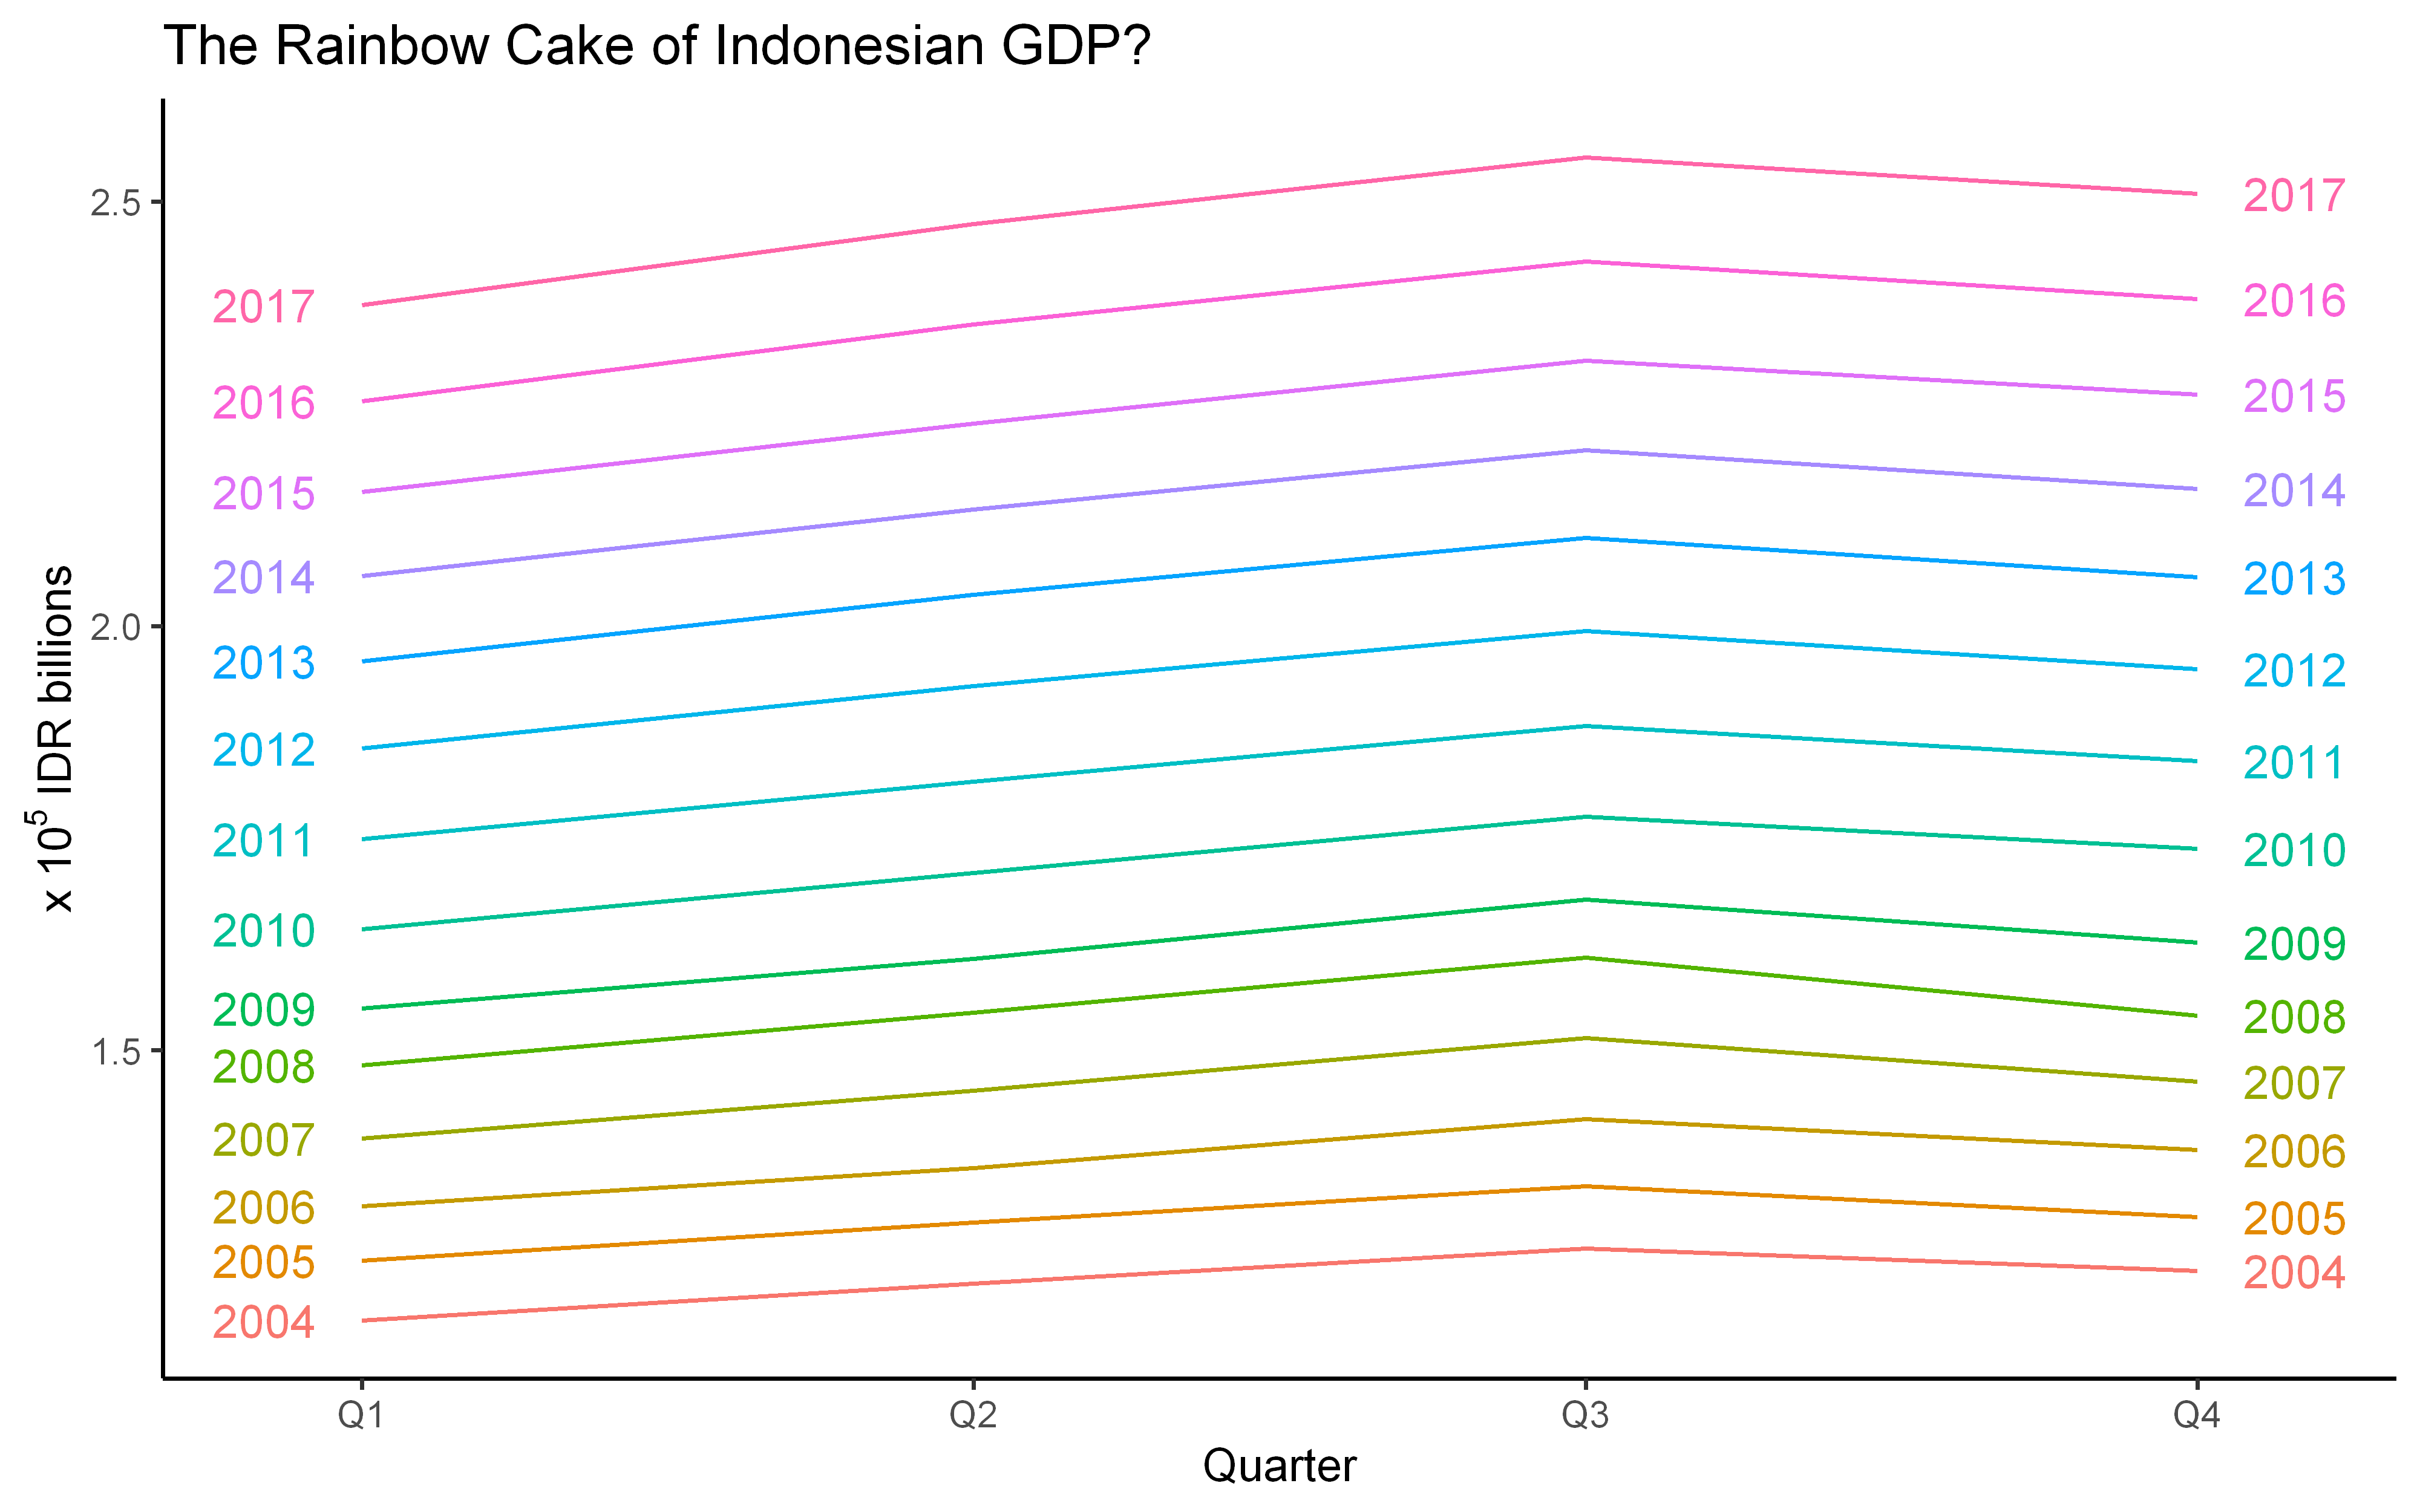

In [20]:
options(repr.plot.width =8, repr.plot.height = 5, repr.plot.res = 500)
GDP_ts <- ts(cap_flow[,  'GDP_R']/10e5 , start=c(2004, 1), frequency=4)
ggseasonplot(GDP_ts, year.labels=TRUE, year.labels.left=TRUE) + theme_classic()+
  ylab(expression(paste("x 10"^"5", ' IDR billions')))+
  ggtitle("The Rainbow Cake of Indonesian GDP?")